In [1]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

In [ ]:
!pip install textblob

In [ ]:
pip install chart_studio

In [ ]:
pip install wordcloud

In [ ]:
pip install cufflinks --upgrade

In [20]:
from textblob import TextBlob
# import cufflinks as cf
# from plotly.offline import plot
import plotly.offline as py

In [51]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/arpitha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arpitha/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
reddit_df = pd.read_csv('data_to_be_cleansed.csv').drop(columns='Unnamed: 0')

In [4]:
reddit_df.head()

,text,title,target
0,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
1,Welcome to /r/depression's check-in post - a p...,"Regular Check-In Post. Plus, a reminder about ...",1
2,But I didn't. \n\nI decided I had enough. I ma...,I almost killed myself today,1
3,"It so easy to get fentanyl, it would be so pea...",God it would be so peaceful to just overdose i...,1
4,"I make people uncomfortable, I'm not good at s...",I think I'm just not meant for interpersonal r...,1


In [5]:
reddit_df.shape

(3570, 3)

In [6]:
reddit_df.drop_duplicates(keep='first', inplace=True)

In [7]:
reddit_df.shape

(2765, 3)

In [8]:
reddit_df.isnull().sum()

text      66
title      0
target     0
dtype: int64

In [9]:
reddit_df.fillna('missingtext', inplace=True)

In [10]:
reddit_df.isnull().sum()

text      0
title     0
target    0
dtype: int64

In [11]:
reddit_df.target.value_counts(normalize=True)

1    0.711754
0    0.288246
Name: target, dtype: float64

In [12]:
reddit_df.head(10)

,text,title,target
0,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
1,Welcome to /r/depression's check-in post - a p...,"Regular Check-In Post. Plus, a reminder about ...",1
2,But I didn't. \n\nI decided I had enough. I ma...,I almost killed myself today,1
3,"It so easy to get fentanyl, it would be so pea...",God it would be so peaceful to just overdose i...,1
4,"I make people uncomfortable, I'm not good at s...",I think I'm just not meant for interpersonal r...,1
5,"Maybe it's just me, but this pissed me off. Ha...",WHY THE FUCK DID I HEAR ELEVATOR MUSIC WHILE W...,1
6,"I dont wanna go to sleep, I dont wanna go to s...",I hate everything so f~cking much,1
7,It's weird that I'm only 19 and feel like this...,I'm only 19 but feel like I'm already in a mid...,1
8,On November 18th 2010 in Grasslake michigan my...,Today marks a decade that my mother has been m...,1
9,Came out from a depressive episode and if ther...,Gonna throw some advice out there for you guys,1


In [13]:
reddit_df.to_csv('clean_data.csv')

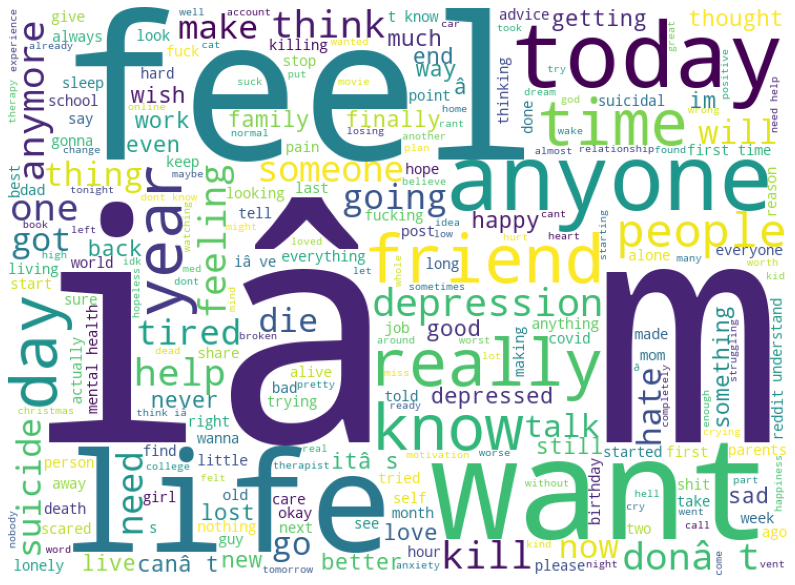

In [14]:
wc_df = pd.read_csv('clean_data.csv', encoding ='latin-1') 
  
text = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for x in wc_df.title: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 500,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
plt.savefig('reddit_wordcloud.png')

In [15]:
def preprocess(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).*(>).*(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')  
    return text

df = pd.read_csv('clean_data.csv')

df['text'] = preprocess(df['text'])

df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [16]:
df

,Unnamed: 0,text,title,target,polarity,review_len,word_count
0,0,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1,0.132340,4792,771
1,1,Welcome to /r/depression's check-in post - a p...,"Regular Check-In Post. Plus, a reminder about ...",1,0.316830,1225,212
2,2,But I didn't. \n\nI decided I had enough. I ma...,I almost killed myself today,1,0.180000,598,125
3,3,"It so easy to get fentanyl, it would be so pea...",God it would be so peaceful to just overdose i...,1,0.341667,90,20
4,4,"I make people uncomfortable, I'm not good at s...",I think I'm just not meant for interpersonal r...,1,-0.370000,340,61
...,...,...,...,...,...,...,...
2760,3165,It feels weird 2020 is almost over. I mean th...,It's already almost the end of the year,0,-0.182708,599,110
2761,3166,My first time meeting a deaf person was when I...,Sign language should be more widely taught &am...,0,0.160340,3830,760
2762,3167,"I recently moved into (sort of) my own place, ...",Why do governmental establishments like DMVs o...,0,0.073077,980,187
2763,3168,"it's a month till' christmas, so I'm wondering...",any video game and anime reccommendations?,0,0.000000,148,27


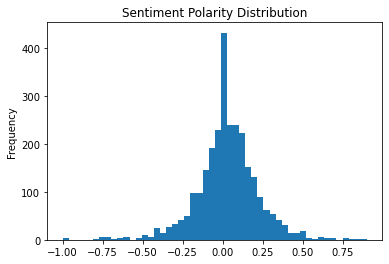

In [26]:
df['polarity'].plot(
    kind='hist',
    bins=50,
#     xTitle='polarity',
#     linecolor='black',
#     yTitle='count',
    title='Sentiment Polarity Distribution')

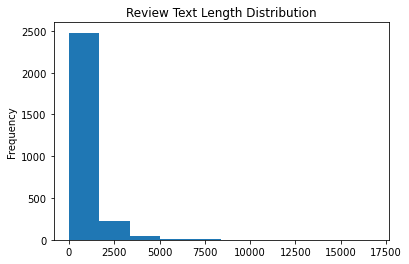

In [31]:
df['review_len'].plot(
    kind='hist',
    bins=10,
#     xTitle='review length',
#     linecolor='black',
#     yTitle='count',
    title='Review Text Length Distribution')

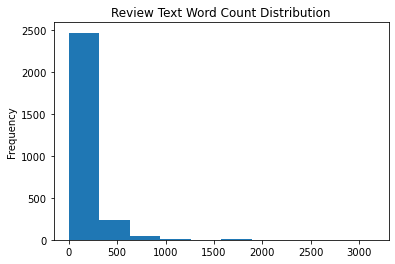

In [30]:
df['word_count'].plot(
    kind='hist',
    bins=10,
#     xTitle='word count',
#     linecolor='black',
#     yTitle='count',
    title='Review Text Word Count Distribution')

to 14443
and 13437
the 9956
my 8948
it 7548
of 6222
me 5681
that 5399
in 4872
but 4329
for 4067
just 3842
is 3694
have 3506
so 3368
this 3363
was 3097
with 2971
like 2876
you 2780


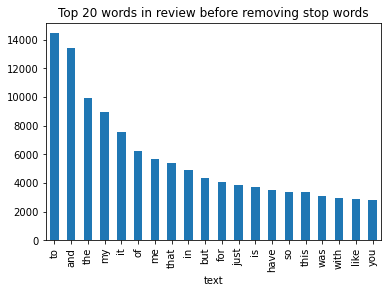

In [37]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review before removing stop words')
#yTitle='Count', linecolor='black', 

just 3842
like 2876
don 2395
feel 2191
want 1920
know 1785
ve 1768
life 1739
really 1290
time 1282
people 1255
think 892
going 837
years 806
day 800
things 773
friends 760
way 710
make 679
help 678


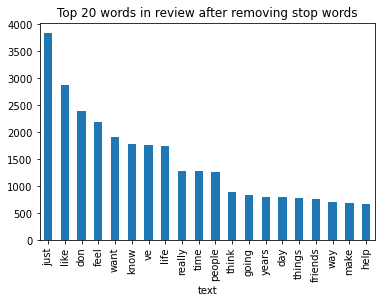

In [40]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')

want to 1434
to be 1067
in the 860
feel like 817
in my 731
to do 712
my life 711
of my 676
of the 630
don know 549
to get 525
ve been 515
for the 453
and it 450
to the 449
going to 449
it was 440
me and 431
to me 429
don want 425


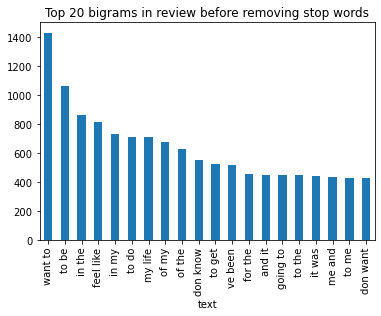

In [41]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return wdef get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')ords_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review before removing stop words')

feel like 826
don know 604
don want 450
just want 315
feels like 175
just don 141
just feel 136
want die 131
mental health 117
don think 104
years ago 102
don feel 97
high school 97
felt like 93
don care 86
dont know 85
life just 82
makes feel 79
like just 77
years old 74


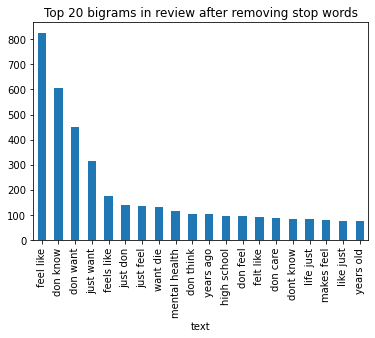

In [43]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')

don want to 335
just want to 208
want to be 202
don know what 175
what to do 167
in my life 161
know what to 146
to talk to 141
of my life 135
want to die 124
be able to 120
don know how 113
to kill myself 111
to do it 103
all the time 102
it feels like 102
the only thing 98
at this point 96
want to do 91
know how to 90


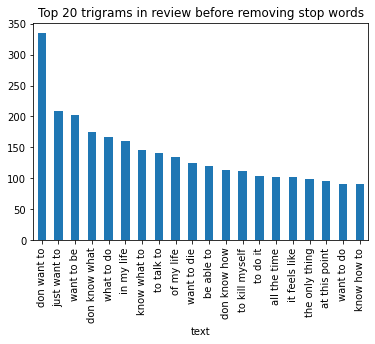

In [44]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review before removing stop words')

just feel like 52
fuck fuck fuck 46
just don know 42
don feel like 37
www reddit com 35
don know anymore 34
don want die 34
end end end 34
kill kill kill 34
https www reddit 32
feel like ve 31
don want live 27
feel like shit 27
feel like just 26
feel like don 25
just want die 24
don know just 23
make feel better 22
just don want 22
just want stop 21


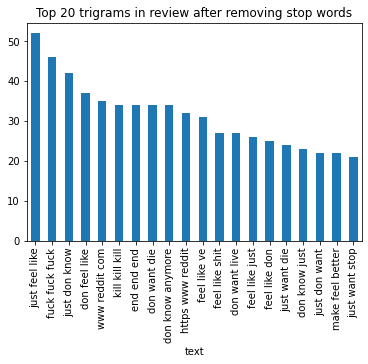

In [45]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df6.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words')

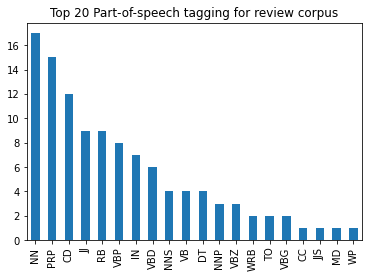

In [52]:
blob = TextBlob(str(df['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='bar',
    title='Top 20 Part-of-speech tagging for review corpus')